In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geofuncs
import collisionfuncs
pd.set_option('display.float_format','{:.2f}'.format)

In [2]:
collisions = pd.read_csv("../matched_data/crash_matched_data/collisions_matched.tsv", sep = '\t')

/var/folders/44/72pmvlr52d96w04q3bmj_jxr0000gn/T/ipykernel_55530/1871496989.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv("../matched_data/crash_matched_data/collisions_matched.tsv", sep = '\t')


In [3]:
# filter out false LATITUDE and LONGITUDE 
criterion1 = (collisions['LATITUDE'] > 38) & (collisions['LATITUDE'] < 42) & (collisions['LONGITUDE'] < -72) & (collisions['LONGITUDE'] > -76)
# filter entries with matched streetID
criterion2 = collisions['streetID'].notnull()
collisions = collisions[criterion1 & criterion2]

In [4]:
collisions.head()

,collision_id,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,int2,zip1,zip2,ll1,ll2,streetID,lat1,long1,lat2,long2
16,22,12/13/2021,6:30,QUEENS,11372.00,40.75,-73.89,"(40.75373, -73.88505)",82 STREET,34 AVENUE,...,82+STREET+%26+34+AVENUE,11370,11372.00,"40.755620,-73.885380","40.753699,-73.885026",357.00,40.76,-73.89,40.75,-73.89
17,22,12/13/2021,6:30,QUEENS,11372.00,40.75,-73.89,"(40.75373, -73.88505)",82 STREET,34 AVENUE,...,82ND+STREET+%26+34TH+AVENUE,11370,11372.00,"40.755620,-73.885380","40.753699,-73.885026",358.00,40.76,-73.89,40.75,-73.89
23,28,12/14/2021,17:15,BROOKLYN,11211.00,40.71,-73.95,"(40.710957, -73.951126)",GRAND STREET,UNION AVENUE,...,GRAND+STREET+%26+LORIMER+STREET,11211,11211.00,"40.710968,-73.951115","40.711175,-73.948909",1298.00,40.71,-73.95,40.71,-73.95
28,39,07/09/2021,0:43,NaN,NaN,40.72,-73.89,"(40.720535, -73.88885)",ELIOT AVENUE,NaN,...,ELIOT+AVENUE+%26+69+LANE,11378,11379.00,"40.720162,-73.889666","40.720531,-73.888847",1119.00,40.72,-73.89,40.72,-73.89
30,41,04/24/2022,4:49,NaN,NaN,40.86,-73.87,"(40.855972, -73.869896)",BOSTON ROAD,BRONX PARK EAST,...,BOSTON+ROAD+%26+PELHAM+PARKWAY,10462,10467.00,"40.855815,-73.869924","40.857248,-73.868940",626.00,40.86,-73.87,40.86,-73.87


In [5]:
collisions.columns

Index(['collision_id', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'coords', 'index_right', 'Roadway.Name', 'From', 'To', 'int1', 'int2',
       'zip1', 'zip2', 'll1', 'll2', 'streetID', 'lat1', 'long1', 'lat2',
       'long2'],
      dtype='object')

In [6]:
collisions.loc[:, ['NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']].describe()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,221458.00,221458.00,221460.00,221460.00,221460.00,221460.00,221460.00,221460.00
mean,0.31,0.00,0.07,0.00,0.04,0.00,0.21,0.00
std,0.69,0.04,0.26,0.03,0.19,0.01,0.64,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,17.00,5.00,6.00,2.00,3.00,1.00,17.00,5.00


In [5]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))

In [6]:
injury_rate = collisionfuncs.rate(collisions, 'NUMBER OF PERSONS INJURED')

In [19]:
injury_rate_geo = geofuncs.to_geojson(injury_rate, 'lat1', 'long1',[
          'NUMBER OF PERSONS INJURED', 'streetID'])

In [21]:
print(injury_rate_geo.shape)
injury_rate_geo.head()

(1543, 2)


,geometry,NUMBER OF PERSONS INJURED
0,POINT (-73.94335 40.78513),0.27
1,POINT (-73.93347 40.79867),0.32
2,POINT (-73.98353 40.73002),0.27
3,POINT (-73.97714 40.73879),0.33
4,POINT (-73.95551 40.76849),0.20


<GeoAxesSubplot: >

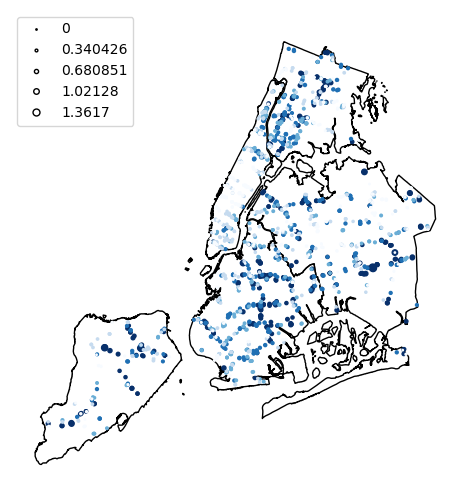

In [11]:
proj = gplt.crs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
ax = gplt.polyplot(boroughs, projection=proj)
gplt.pointplot(
    injury_rate_geo, 
    projection=proj,
    ax=ax, 
    hue='NUMBER OF PERSONS INJURED', 
    cmap='Blues',
    scheme='quantiles',
    scale='NUMBER OF PERSONS INJURED',
    legend=True, 
    legend_var='scale',)